In [1]:
import xarray as xr

In [2]:
with xr.open_dataset('LowRes_Hourly_Energy/ERA5_LowRes_Hourly_Energy_2021_01.nc') as dsr:
    # dsr = dsr.sel(time='2021-01-01').mean(dim='time')
    dsr = dsr.isel(time=0)
dsr

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
    time       datetime64[ns] 2021-01-01
Data variables:
    p74.162    (latitude, longitude) float32 ...
    p70.162    (latitude, longitude) float32 ...
    p68.162    (latitude, longitude) float32 ...
    p76.162    (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-24 11:10:33 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [3]:
vnames = {'p74.162': 'nw_geopotential_flux',
          'p70.162': 'nw_heat_flux',
          'p68.162': 'nw_kinetic_flux',
          'p76.162': 'nw_total_energy_flux'}
dsr = dsr.rename(vnames)

dsr['nw_latent_flux'] = dsr['nw_total_energy_flux'] - dsr['nw_geopotential_flux'] - dsr['nw_heat_flux'] - dsr['nw_kinetic_flux']

In [4]:
with xr.open_dataset('test_highres_energy/ERA5_HiRes_Hourly_PL_2021_01_01.nc') as ds:
    ds = ds.isel(time=0).load()

In [ ]:
# ds = ds.sel(level=slice(100, 1000))

# import metpy.calc as mpcalc
# from metpy.units import units
# p = ds.level * units.hPa
# t = ds.t * units.K
# q = ds.q * units.kilogram / units.kilogram
# d = mpcalc.density(p, t, q)
# d.isel(level=-1).plot();

In [5]:
from scipy.integrate import cumtrapz, trapz

In [6]:
g = 9.80616
cp = 1004.64
L = 2.5104e6

In [7]:
zcoords = ds.level * 100  # note the "* 100" to convert hPa into SI units!
integral = trapz(ds.q * ds.v, x=zcoords, axis=0)  

In [8]:
integral.shape

(721, 1440)

In [10]:
integral = (ds.q.isel(level=0) * 0 + integral * L / g)

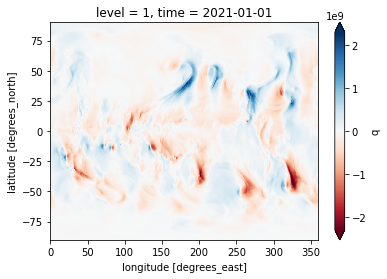

In [11]:
integral.plot(vmin=-2.3e9, vmax=2.3e9, cmap='RdBu');

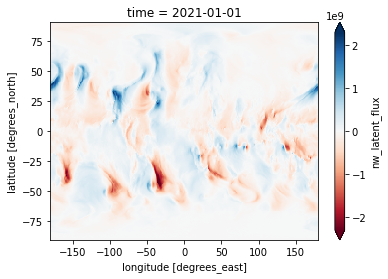

In [12]:
dsr['nw_latent_flux'].plot(vmin=-2.3e9, vmax=2.3e9, cmap='RdBu');

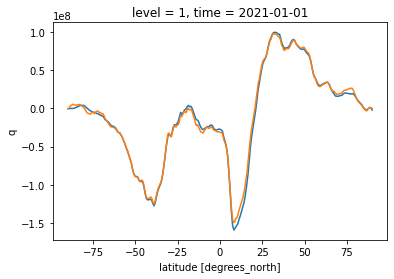

In [13]:
dsr['nw_latent_flux'].mean(dim='longitude').plot();
integral.mean(dim='longitude').plot();

In [14]:
integral = trapz(ds.z * ds.v, x=zcoords, axis=0)  

In [15]:
integral = (ds.q.isel(level=0) * 0 + integral / g)

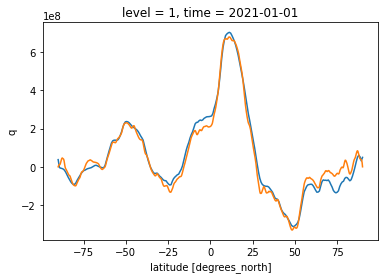

In [16]:
dsr['nw_geopotential_flux'].mean(dim='longitude').plot();
integral.mean(dim='longitude').plot();

In [17]:
integral = trapz(ds.t * ds.v, x=zcoords, axis=0)  # are we clear on what this function does?

In [18]:
integral = (ds.q.isel(level=0) * 0 + integral / g * cp)

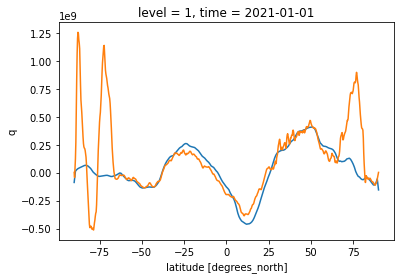

In [19]:
dsr['nw_heat_flux'].mean(dim='longitude').plot();
integral.mean(dim='longitude').plot();

In [26]:
integral.mean(dim='longitude').argmax()

<xarray.DataArray 'q' ()>
array(711)
Coordinates:
    level    int32 1
    time     datetime64[ns] 2021-01-01

In [29]:
integral.mean(dim='longitude').argmin()

<xarray.DataArray 'q' ()>
array(674)
Coordinates:
    level    int32 1
    time     datetime64[ns] 2021-01-01

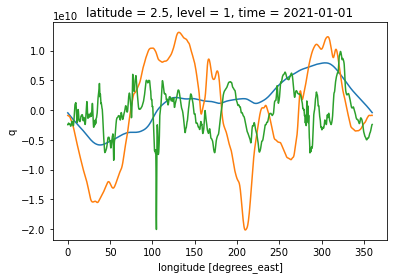

In [31]:
integral.isel(latitude=711).plot();
integral.isel(latitude=674).plot();
integral.isel(latitude=350).plot();

In [36]:
integral.isel(latitude=711).mean(), integral.isel(latitude=674).mean(), integral.isel(latitude=350).mean()

(<xarray.DataArray 'q' ()>
 array(1.25746813e+09)
 Coordinates:
     latitude  float32 -87.75
     level     int32 1
     time      datetime64[ns] 2021-01-01,
 <xarray.DataArray 'q' ()>
 array(-5.13468241e+08)
 Coordinates:
     latitude  float32 -78.5
     level     int32 1
     time      datetime64[ns] 2021-01-01,
 <xarray.DataArray 'q' ()>
 array(-2.13156359e+08)
 Coordinates:
     latitude  float32 2.5
     level     int32 1
     time      datetime64[ns] 2021-01-01)

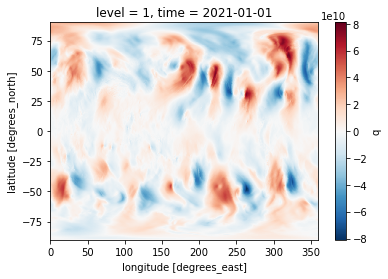

In [20]:
integral.plot();

In [21]:
integral.data.dtype

dtype('float64')

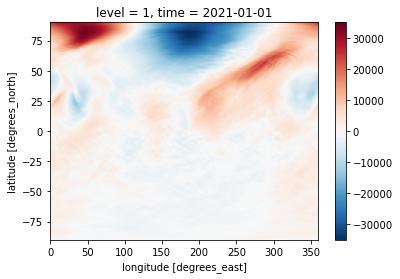

In [33]:
(ds.t * ds.v).isel(level=0).plot();

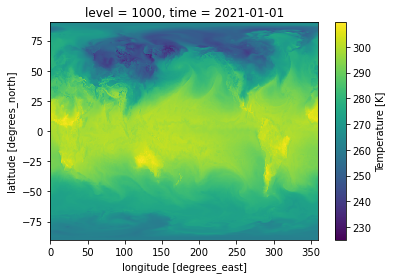

In [38]:
(ds.t).isel(level=-1).plot();

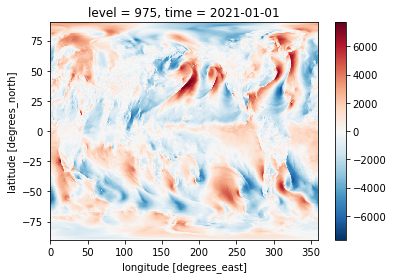

In [35]:
(ds.t * ds.v).isel(level=-2).plot();